In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write=True

In this notebook we collect the MSE results for the models that were evaluated on 2023 data.

In [7]:

#MSE values for models
LinearInterp=[0.679228361280242, 2.526317467717178, 1.8751985815220777, 3.3985990247556255, 3.4755440464642504]
knn=[1.7802790995171829,  2.7589207485185043, 4.290671757081448, 4.031122796370508, 4.558172325362513]
OLS_on_daily_return=[0.9361977884092066, 3.2863610311881963, 4.271253451251555, 4.753547094214594, 5.787583223734034]
fbARIMA = [0.9152634246800739, 3.2205527117102535, 2.4955888146036136, 3.716943390325388, 4.007862916544621]

models=['LinearInterp', 'KNN_regr', 'OLS_daily_ret', 'fbARIMA' ]

df_all_scores=pd.DataFrame({'KNN_regr':knn, 
                            'LinearInterp':LinearInterp,
                             'OLS_daily_ret':OLS_on_daily_return,
                             'fbARIMA':fbARIMA,
                             }, 
                             index=[i for i in range(1,6)])




In [8]:
df_all_scores_relative=df_all_scores[models[1:]].div(df_all_scores[models[0]], axis=0)
VAR_w_GC=[2.97074342, 1.83176838, 3.67772064, 3.95524688, 4.71109053] #relative MSE
df_all_scores_relative['VAR_w_GC']=pd.Series(VAR_w_GC, index=list(range(1,6)))
df_all_scores_relative

,KNN_regr,OLS_daily_ret,fbARIMA,VAR_w_GC
1,2.621032,1.378326,1.347505,2.970743
2,1.092072,1.300850,1.274801,1.831768
3,2.288116,2.277761,1.330840,3.677721
4,1.186113,1.398678,1.093669,3.955247
5,1.311499,1.665231,1.153161,4.711091


<Figure size 1200x1200 with 0 Axes>

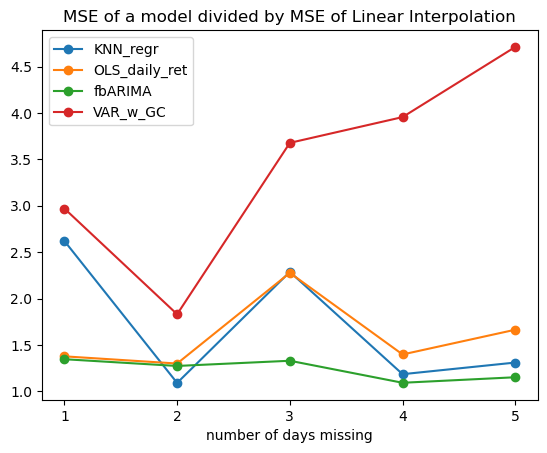

In [10]:
fig=plt.figure(figsize=(12,12))
df_all_scores_relative.plot(marker='o')
ax=plt.gca()
ax.set_xlabel('number of days missing')
#ax.set_ylabel('MSE of a model divided by MSE of Linear Interpolation')
plt.title('MSE of a model divided by MSE of Linear Interpolation')
ax.set_xticks(list(range(1,6)))
plt.show()